# **Teaching & Beauty Score Analysis Report** #
**Date**: 27th Oct, 2024

**Prepared by**: Angad Kannaujiya

## **1. Introduction** ##

The data are gathered from end of semester student evaluations for 463 courses taught by a sample of 94 professors from the University of Texas at Austin. In addition, six students rate the professors' physical appearance.

## **2. Objective** ##

The objective of this dataset is to explore the relationship between various factors, including professor beauty, ethnicity, gender, class level, and others, on student evaluations. It aims to investigate whether these factors have a significant impact on how students perceive and rate their professors.

## **3. Dataset Overview** ##

* **Source**: OpenIntro Dataset (https://www.sciencedirect.com/science/article/abs/pii/S0272775704001165?via%3Dihub)
* **Number of Instances**: Observations = 463
* **Number of Features**: Features = 22 (excluding the target variable)
* **Target Variable**: score

****Features****
* **course_id**: Variable identifying the course (out of 463 courses).
* **gender**: Gender of professor: female, male.
* **age**: Age of professor.
* **bty_avg**: Average beauty rating of professor.

## **4. Data Preprocessing** ##

* **Handling Missing Values**: Checked for missing values and ensured data integrity.
* **Feature Scaling**: N/A
* **Data Seperation**: Dataset was seperated in X & y 

## **5. Regression Model**

* **Algorithm**: Simple Linear Regression from **Statsmodels** was chosen for its Explanation problems.

# **Code**

### **Step 1. Import the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2. Load the dataset**

In [2]:
df = pd.read_csv(r"C:\Users\Angad\OneDrive\Code Script\Python Code Script\Dataset\Rdatasets\csv\openintro\evals.csv")
df.head()

,rownames,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,1,4.7,tenure track,minority,female,english,36,55.81395,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,2,2,1,4.1,tenure track,minority,female,english,36,68.80000,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3,3,1,3.9,tenure track,minority,female,english,36,60.80000,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4,4,1,4.8,tenure track,minority,female,english,36,62.60163,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,5,5,2,4.6,tenured,not minority,male,english,59,85.00000,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


For the simplicity, we will use only course_id, score(teaching score), bty_avg(average beauty score) and age columns.

In [3]:
df_filtered = df[['course_id', 'score', 'bty_avg', 'age', 'gender']]
df_filtered.head()

,course_id,score,bty_avg,age,gender
0,1,4.7,5.0,36,female
1,2,4.1,5.0,36,female
2,3,3.9,5.0,36,female
3,4,4.8,5.0,36,female
4,5,4.6,3.0,59,male


### **Step 3. Explore the data**

In [4]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   course_id  463 non-null    int64  
 1   score      463 non-null    float64
 2   bty_avg    463 non-null    float64
 3   age        463 non-null    int64  
 4   gender     463 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 18.2+ KB


In [5]:
df_filtered[['score', 'bty_avg', 'age']].describe()

,score,bty_avg,age
count,463.000000,463.000000,463.000000
mean,4.174730,4.417844,48.365011
std,0.543865,1.527380,9.802742
min,2.300000,1.667000,29.000000
25%,3.800000,3.167000,42.000000
50%,4.300000,4.333000,48.000000
75%,4.600000,5.500000,57.000000
max,5.000000,8.167000,73.000000


Average beauty score is 4.42, minimum is 1.67 and max is 8.17 on the scale of 1-10

Maximum teaching score is 5 on the scale of 1-5

let's check the correlations amongs these variables.

In [6]:
 df_filtered[['score', 'bty_avg', 'age']].corr()

,score,bty_avg,age
score,1.000000,0.187142,-0.107032
bty_avg,0.187142,1.000000,-0.304603
age,-0.107032,-0.304603,1.000000


The correlation coefficient of 0.18 indicate that the relationship between teaching score and beauty score is weakly positive.

#### **Visual Exploration**

<Axes: xlabel='bty_avg', ylabel='score'>

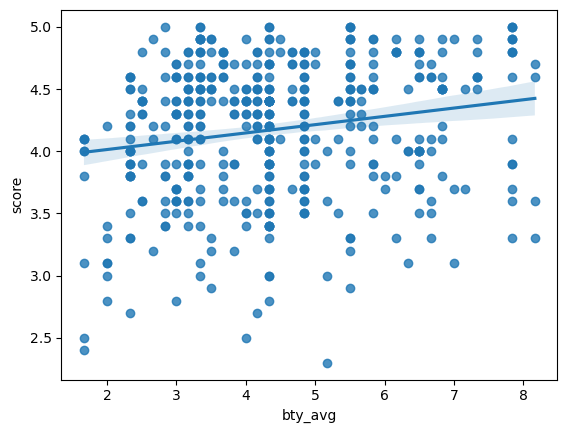

In [6]:
sns.regplot(data=df_filtered, x = 'bty_avg', y = 'score')

The relationship between teaching score and age is weekly negatice

<Axes: xlabel='score', ylabel='age'>

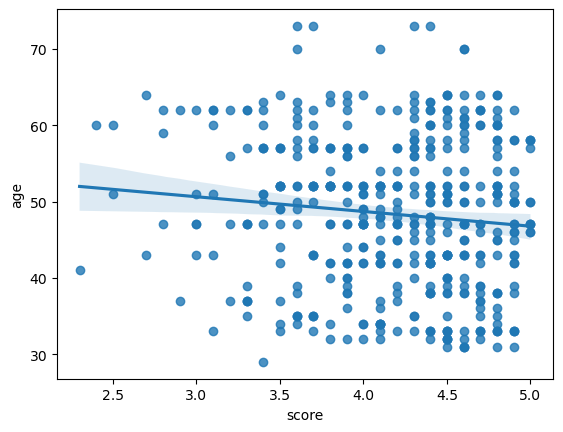

In [7]:
sns.regplot(data=df_filtered, x = 'score', y = 'age')

### **Step 4. Preprocess Data**

#### **Handlimg missing values**

In [8]:
df_filtered.isnull().sum()

course_id    0
score        0
bty_avg      0
age          0
gender       0
dtype: int64

#### **Seperate features and target variables**

In [10]:
import statsmodels.api as sm
X = df_filtered['bty_avg']
y = df_filtered['score']
X = sm.add_constant(X)

### **Step 5. Model Creation**

#### **Fit the model to training data**

In [11]:
model = sm.OLS(y, X).fit()

In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           5.08e-05
Time:                        16:40:18   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0